# Tunisian Hate Speech and Abusive classification


# 1-Libraries  2-Discover the dataset  3-Feature engineering  4-Classification    5-Results 


# 1-Libraries

In [196]:
import nltk
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn import model_selection, naive_bayes, svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression


pd.set_option('display.max_columns', 10000)

In [2]:
data=pd.read_excel ('T-HSAB.xlsx',header=None)
data2=pd.read_excel ('T-HSAB.xlsx',header=None)

# 2-Discover the dataset

## Multi-class  Dataset

### The First dataset is for the multi-classification (Hate,Normal or Abusive)

In [18]:
data

,0,1
0,اسغي ياشعب تونس تدعوا بالاسلام كفار الحمدلله ن...,hate
1,قطع يد السارق توفرت الشروط شرط الحد الأدنى قيم...,normal
2,تلوموش لطفي لعبدلي شرف,normal
3,مستغرب شعب يسمع تفاهة شانو لى الدرجة الشعب تاف...,normal
4,هههخ غزلتني مافهمتش شمدخلها الموضوع تتنطر وحده...,normal
...,...,...
6019,رحماك رب رحماك رب التوانسة ولات تناقش القرأن ت...,hate
6020,إنسان تافه وكلام فارغ تفوووو كلب,abusive
6021,مريم معجبييك مي تحتي عيني قناة عادة مكروها ونط...,normal
6022,نكره امها,hate


In [4]:
data[1].unique()

array(['hate', 'normal', 'abusive'], dtype=object)

In [8]:
'''
def new_column (row):
    
    if row[1] == 'normal' :
        return 0
    
    elif row[1]=='hate':
        return 1
    elif row[1]=='abusive':
        return 2
   
 '''  

In [9]:
#data['target'] = data.apply (new_column, axis=1)

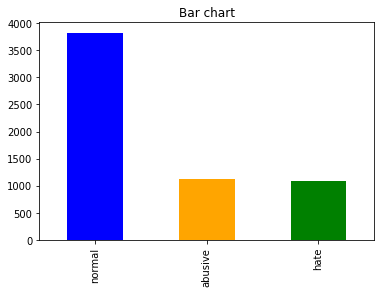

In [24]:
count_Class=pd.value_counts(data[1], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange","green"])
plt.title('Bar chart')
plt.show()

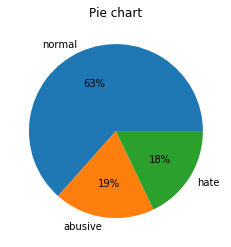

In [25]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

## Binary classification Dataset

### The Second dataset is for the binary classification (Normal or Abusive). So we're gonna merge the Hate class instances with the Abusive ones

In [22]:
for i in data2.loc[:,1]:
    
    if i not in ['normal']:
        data2[1]=data2[1].replace(i,'abusive')

In [23]:
data2

,0,1
0,اسغي ياشعب تونس تدعوا بالاسلام كفار الحمدلله ن...,abusive
1,قطع يد السارق توفرت الشروط شرط الحد الأدنى قيم...,normal
2,تلوموش لطفي لعبدلي شرف,normal
3,مستغرب شعب يسمع تفاهة شانو لى الدرجة الشعب تاف...,normal
4,هههخ غزلتني مافهمتش شمدخلها الموضوع تتنطر وحده...,normal
...,...,...
6019,رحماك رب رحماك رب التوانسة ولات تناقش القرأن ت...,abusive
6020,إنسان تافه وكلام فارغ تفوووو كلب,abusive
6021,مريم معجبييك مي تحتي عيني قناة عادة مكروها ونط...,normal
6022,نكره امها,abusive


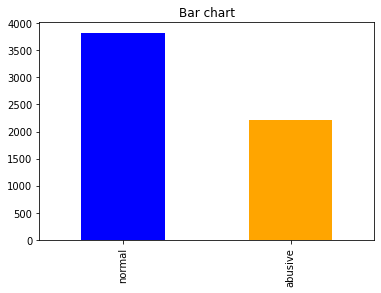

In [27]:
count_Class2=pd.value_counts(data2[1], sort= True)
count_Class2.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

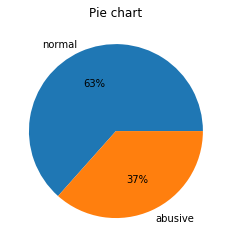

In [28]:
count_Class2.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

# 3-Feature engineering

## Multi-class dataset 

In [30]:
X=data[0]
Y=data[1]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=True,random_state=1)

#### uni+bi(TF≥2) 

In [35]:
%%time
tf_idf = TfidfVectorizer(ngram_range=(1, 2),min_df=2)
X_train_tfidf = tf_idf.fit_transform(X_train)
X_test_tfidf = tf_idf.transform(X_test)

Wall time: 200 ms


In [ ]:

#df_idf = pd.DataFrame(tf_idf.idf_, index=tf_idf.get_feature_names(),columns=["tf_idf.get_feature_names()"]) 

#### Uni gram 

In [36]:
tf_idf2 = TfidfVectorizer(ngram_range=(1, 1))
X_train_tfidf2 = tf_idf2.fit_transform(X_train)
X_test_tfidf2 = tf_idf2.transform(X_test)

## Binary-class dataset

In [37]:
X2=data2[0]
Y2=data2[1]

In [38]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, Y2, test_size=0.2, random_state=1,shuffle=True,stratify=Y2)

#### uni+bi(TF≥2)

In [39]:
tf_idf3 = TfidfVectorizer(ngram_range=(1, 2),min_df=2)
X_train_tfidf3 = tf_idf3.fit_transform(X_train2)
X_test_tfidf3 = tf_idf3.transform(X_test2)

#### uni gram

In [40]:
tf_idf4 = TfidfVectorizer(ngram_range=(1, 1))
X_train_tfidf4 = tf_idf4.fit_transform(X_train2)
X_test_tfidf4 = tf_idf4.transform(X_test2)

# 4-Classification 

In [43]:
kfold=StratifiedKFold(n_splits=5,shuffle=True)

In [252]:
models=[]

## Multi-class classification

In [171]:
#Evaluation Funtion
def evaluation (model,X_test,y_test,y_predicted):
    
    print('{0:25}{1:10}{2:10}{3:10}{4:10}'.format('algorithm', 'accuracy',  'precision', 'recall','F1'))
    print('---------------------------------------------------------------------')
    print('{0:25}{1:10.2f}{2:10.2f}{3:10.2f}{4:10.2f}'.format(model,accuracy_score(y_test, y_predicted),
                                           precision_score(y_test, y_predicted,average='weighted'),
                                           recall_score(y_test, y_predicted, average='weighted'),
                                           f1_score(y_test, y_predicted, average='weighted')))
    

In [280]:
'''
IT's the same evaluation function but I just drop the first line. We're gonna use this function for the final results 
comparison
'''
def evaluation2 (classe,model,features,y_test,y_predicted):
    
    
    print('{0:10}{1:15}{2:17}{3:10.2f}{4:10.2f}{5:10.2f}{6:10.2f}'.format(classe,model,features,
                                                                accuracy_score(y_test, y_predicted),
                                                                precision_score(y_test, y_predicted,average='weighted'),
                                                                recall_score(y_test, y_predicted, average='weighted'),
                                                                f1_score(y_test, y_predicted, average='weighted')))
    print('-----------------------------------------------------------------------------')

In [175]:
#print( tf_idf.vocabulary_)

In [177]:
#tf_idf.get_feature_names()

In [194]:
#print(X_train_tfidf)

In [195]:
#(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
#df_idf = pd.DataFrame(tf_idf.idf_, index=tf_idf.get_feature_names(),columns=["idf_weights"]) 

In [50]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
predicted_naivebayes = nb_model.predict(X_test_tfidf)

In [180]:
evaluation ('Naive Bayes',X_test_tfidf,y_test,predicted_naivebayes)


algorithm                accuracy  precision recall    F1        
---------------------------------------------------------------------
Naive Bayes                    0.69      0.73      0.69      0.61


### GridSearch for Naive Bayes 

In [62]:
param_grid = {
    "alpha": np.concatenate(
        [
            np.arange(0.0001, 0.001, 0.0001),
            np.arange(0.001, 0.01, 0.001),
            np.arange(0.01, 0.1, 0.01),
            np.arange(0.1, 1, 0.1),
            np.arange(1, 10, 1),
            np.arange(10, 100, 5)
        ]) 
}

model = MultinomialNB()
grid_cv_model = GridSearchCV(model, param_grid, n_jobs=-1, verbose=3, cv=5,scoring='accuracy')
grid_cv_model.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': array([1.0e-04, 2.0e-04, 3.0e-04, 4.0e-04, 5.0e-04, 6.0e-04, 7.0e-04,
       8.0e-04, 9.0e-04, 1.0e-03, 2.0e-03, 3.0e-03, 4.0e-03, 5.0e-03,
       6.0e-03, 7.0e-03, 8.0e-03, 9.0e-03, 1.0e-02, 2.0e-02, 3.0e-02,
       4.0e-02, 5.0e-02, 6.0e-02, 7.0e-02, 8.0e-02, 9.0e-02, 1.0e-01,
       2.0e-01, 3.0e-01, 4.0e-01, 5.0e-01, 6.0e-01, 7.0e-01, 8.0e-01,
       9.0e-01, 1.0e+00, 2.0e+00, 3.0e+00, 4.0e+00, 5.0e+00, 6.0e+00,
       7.0e+00, 8.0e+00, 9.0e+00, 1.0e+01, 1.5e+01, 2.0e+01, 2.5e+01,
       3.0e+01, 3.5e+01, 4.0e+01, 4.5e+01, 5.0e+01, 5.5e+01, 6.0e+01,
       6.5e+01, 7.0e+01, 7.5e+01, 8.0e+01, 8.5e+01, 9.0e+01, 9.5e+01])},
             scoring='accuracy', verbose=3)

In [63]:
grid_cv_model.best_params_

{'alpha': 0.2}

In [248]:
NB_best = MultinomialNB(alpha=0.2)
NB_best.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=0.2)

In [249]:
predicted_naivebayes_best=NB_best.predict(X_test_tfidf)

In [250]:
evaluation ('Naive Bayes',X_test_tfidf,y_test,predicted_naivebayes_best)

algorithm                accuracy  precision recall    F1        
---------------------------------------------------------------------
Naive Bayes                    0.74      0.73      0.74      0.71


### SVM

In [76]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train_tfidf2, y_train)

SVC(gamma='auto', kernel='linear')

In [78]:
predicted_svm=SVM.predict(X_test_tfidf2)

In [183]:
evaluation ('SVM',X_test_tfidf,y_test,predicted_svm)

algorithm                accuracy  precision recall    F1        
---------------------------------------------------------------------
SVM                            0.75      0.75      0.75      0.73


In [86]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    kernel=['linear', 'poly', 'rbf']
    param_grid = {'C': Cs, 'gamma' : gammas,'kernel':kernel}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [87]:
svc_param_selection(X_train_tfidf2,y_train ,5)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [88]:
svc_best=svm.SVC(C= 10, gamma=0.1,kernel='rbf')
svc_best.fit(X_train_tfidf2, y_train)

SVC(C=10, gamma=0.1)

In [90]:
predicted_svm_best=svc_best.predict(X_test_tfidf2)

In [184]:
evaluation ('SVM ',X_test_tfidf2,y_test,predicted_svm_best)

algorithm                accuracy  precision recall    F1        
---------------------------------------------------------------------
SVM                            0.77      0.76      0.77      0.75


### Logistic Regression

In [238]:
lg_reg_clf1 = LogisticRegression()
lg_reg_clf1.fit(X_train_tfidf2, y_train)
predicted_lg1=lg_reg_clf1.predict(X_test_tfidf2)

In [239]:
evaluation ('Logistic Regression ',X_test_tfidf2,y_test,predicted_lg1)

algorithm                accuracy  precision recall    F1        
---------------------------------------------------------------------
Logistic Regression            0.71      0.73      0.71      0.67


In [240]:
LR1 = LogisticRegression()
LRparam_grid = {
     
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
     'solver': ['newton-cg', 'lbfgs', 'liblinear','saga']
      
}
LR_search1 = GridSearchCV(LR1, param_grid=LRparam_grid, verbose = 3, cv=kfold,scoring='accuracy')
LR_search1.fit(X_train_tfidf2, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ..........C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END ..........C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END ..........C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END ..........C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END ..........C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END ..............C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END ..............C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END ..............C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END ..............C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END ..............C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] END ..........C=0.001, penalty=l1, sol

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test part

[CV 5/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END ...............C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END ...............C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END ...............C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END ...............C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ...............C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END ..........C=0.001, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 2/5] END ..........C=0.001, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 3/5] END ..........C=0.001, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 4/5] END ..........C=0.001, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 5/5] END ..........C=0.001, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 1/5] END ..............C=0.001, penalty=l2, solver=lbfgs; total time=   0.1s
[CV 2/5] END ..............C

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test part

[CV 5/5] END ...........C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END ................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END ................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END ................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END ...........C=0.01, penalty=l2, solver=newton-cg; total time=   0.2s
[CV 2/5] END ...........C=0.01, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 3/5] END ...........C=0.01, penalty=l2, solver=newton-cg; total time=   0.2s
[CV 4/5] END ...........C=0.01, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 5/5] END ...........C=0.01, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 1/5] END ...............C=0.01, penalty=l2, solver=lbfgs; total time=   0.1s
[CV 2/5] END ...............

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test part

[CV 4/5] END ............C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END .................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END .................C=0.1, penalty=l1, solver=saga; total time=   0.1s
[CV 3/5] END .................C=0.1, penalty=l1, solver=saga; total time=   0.1s
[CV 4/5] END .................C=0.1, penalty=l1, solver=saga; total time=   0.1s
[CV 5/5] END .................C=0.1, penalty=l1, solver=saga; total time=   0.1s
[CV 1/5] END ............C=0.1, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 2/5] END ............C=0.1, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 3/5] END ............C=0.1, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 4/5] END ............C=0.1, penalty=l2, solver=newton-cg; total time=   0.2s
[CV 5/5] END ............C=0.1, penalty=l2, solver=newton-cg; total time=   0.2s
[CV 1/5] END ...............

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test part

[CV 2/5] END ..............C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV 3/5] END ..............C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV 4/5] END ..............C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV 5/5] END ..............C=1, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 1/5] END ...................C=1, penalty=l1, solver=saga; total time=   1.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 2/5] END ...................C=1, penalty=l1, solver=saga; total time=   1.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 3/5] END ...................C=1, penalty=l1, solver=saga; total time=   1.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 4/5] END ...................C=1, penalty=l1, solver=saga; total time=   1.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 5/5] END ...................C=1, penalty=l1, solver=saga; total time=   1.1s
[CV 1/5] END ..............C=1, penalty=l2, solver=newton-cg; total time=   0.3s
[CV 2/5] END ..............C=1, penalty=l2, solver=newton-cg; total time=   0.3s
[CV 3/5] END ..............C=1, penalty=l2, solver=newton-cg; total time=   0.3s
[CV 4/5] END ..............C=1, penalty=l2, solver=newton-cg; total time=   0.3s
[CV 5/5] END ..............C=1, penalty=l2, solver=newton-cg; total time=   0.3s
[CV 1/5] END ..................C=1, penalty=l2, solver=lbfgs; total time=   0.9s
[CV 2/5] END ..................C=1, penalty=l2, solver=lbfgs; total time=   1.0s
[CV 3/5] END ..................C=1, penalty=l2, solver=lbfgs; total time=   1.1s
[CV 4/5] END ..................C=1, penalty=l2, solver=lbfgs; total time=   1.0s
[CV 5/5] END ..................C=1, penalty=l2, solver=lbfgs; total time=   1.2s
[CV 1/5] END ..............C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END ..............C

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test part

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 1/5] END .............C=10, penalty=l1, solver=liblinear; total time=  28.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 2/5] END .............C=10, penalty=l1, solver=liblinear; total time=  14.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 3/5] END .............C=10, penalty=l1, solver=liblinear; total time=  30.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 4/5] END .............C=10, penalty=l1, solver=liblinear; total time=  41.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 5/5] END .............C=10, penalty=l1, solver=liblinear; total time=  40.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 1/5] END ..................C=10, penalty=l1, solver=saga; total time=  11.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 2/5] END ..................C=10, penalty=l1, solver=saga; total time=  11.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 3/5] END ..................C=10, penalty=l1, solver=saga; total time=  11.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 4/5] END ..................C=10, penalty=l1, solver=saga; total time=  11.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 5/5] END ..................C=10, penalty=l1, solver=saga; total time=  11.7s
[CV 1/5] END .............C=10, penalty=l2, solver=newton-cg; total time=   0.6s
[CV 2/5] END .............C=10, penalty=l2, solver=newton-cg; total time=   0.7s
[CV 3/5] END .............C=10, penalty=l2, solver=newton-cg; total time=   0.5s
[CV 4/5] END .............C=10, penalty=l2, solver=newton-cg; total time=   0.6s
[CV 5/5] END .............C=10, penalty=l2, solver=newton-cg; total time=   0.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 1/5] END .................C=10, penalty=l2, solver=lbfgs; total time=   2.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 2/5] END .................C=10, penalty=l2, solver=lbfgs; total time=   1.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 3/5] END .................C=10, penalty=l2, solver=lbfgs; total time=   1.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 4/5] END .................C=10, penalty=l2, solver=lbfgs; total time=   1.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 5/5] END .................C=10, penalty=l2, solver=lbfgs; total time=   1.9s
[CV 1/5] END .............C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END .............C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END .............C=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV 4/5] END .............C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV 5/5] END .............C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV 1/5] END ..................C=10, penalty=l2, solver=saga; total time=   0.4s
[CV 2/5] END ..................C=10, penalty=l2, solver=saga; total time=   0.3s
[CV 3/5] END ..................C=10, penalty=l2, solver=saga; total time=   0.3s
[CV 4/5] END ..................C=10, penalty=l2, solver=saga; total time=   0.3s
[CV 5/5] END ..................C=10, penalty=l2, solver=saga; total time=   0.3s
[CV 1/5] END ............C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END ............C=1

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test part

[CV 1/5] END ............C=100, penalty=l1, solver=liblinear; total time=   0.6s
[CV 2/5] END ............C=100, penalty=l1, solver=liblinear; total time=   0.5s
[CV 3/5] END ............C=100, penalty=l1, solver=liblinear; total time=   0.9s
[CV 4/5] END ............C=100, penalty=l1, solver=liblinear; total time=   0.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 5/5] END ............C=100, penalty=l1, solver=liblinear; total time=  13.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 1/5] END .................C=100, penalty=l1, solver=saga; total time=  45.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 2/5] END .................C=100, penalty=l1, solver=saga; total time=  44.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 3/5] END .................C=100, penalty=l1, solver=saga; total time=  45.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 4/5] END .................C=100, penalty=l1, solver=saga; total time=  48.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 5/5] END .................C=100, penalty=l1, solver=saga; total time=  45.4s
[CV 1/5] END ............C=100, penalty=l2, solver=newton-cg; total time=   0.5s
[CV 2/5] END ............C=100, penalty=l2, solver=newton-cg; total time=   0.9s
[CV 3/5] END ............C=100, penalty=l2, solver=newton-cg; total time=   0.9s
[CV 4/5] END ............C=100, penalty=l2, solver=newton-cg; total time=   0.6s
[CV 5/5] END ............C=100, penalty=l2, solver=newton-cg; total time=   0.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 1/5] END ................C=100, penalty=l2, solver=lbfgs; total time=   2.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 2/5] END ................C=100, penalty=l2, solver=lbfgs; total time=   2.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 3/5] END ................C=100, penalty=l2, solver=lbfgs; total time=   2.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 4/5] END ................C=100, penalty=l2, solver=lbfgs; total time=   1.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 5/5] END ................C=100, penalty=l2, solver=lbfgs; total time=   1.9s
[CV 1/5] END ............C=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV 2/5] END ............C=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV 3/5] END ............C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=100, penalty=l2, solver=liblinear; total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 1/5] END .................C=100, penalty=l2, solver=saga; total time=   0.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 2/5] END .................C=100, penalty=l2, solver=saga; total time=   0.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 3/5] END .................C=100, penalty=l2, solver=saga; total time=   0.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 4/5] END .................C=100, penalty=l2, solver=saga; total time=   0.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.63789183 0.63789183 0.63789183 0.63789183
 0.63789183 0.63789183        nan        nan 0.63789183 0.63789183
 0.63789183 0.63789183 0.63789183 0.63789183        nan        nan
 0.63809952 0.63851467 0.64141945 0.64141945 0.63872214 0.64162692
        nan        nan 0.71280404 0.71612376 0.70201264 0.70201264
 0.68416623 0.70201264        nan        nan 0.7389477  0.74330606
 0.73936415 0.73894921 0.73645937 0.73915625        nan        nan
 0.7362491  0.7449671  0.74475985 0.74413701 0.74289306 0.74538312]
  category=UserWarning


[CV 5/5] END .................C=100, penalty=l2, solver=saga; total time=   0.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']},
             scoring='accuracy', verbose=3)

In [244]:
LR_search1.best_score_

0.745383117246847

In [245]:
LR_search1.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'saga'}

In [246]:
LR_best1=LogisticRegression(C= 100,  penalty= 'l2',solver='saga')
LR_best1.fit(X_train_tfidf2, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=100, solver='saga')

In [247]:
predicted_best_LG1=LR_best1.predict(X_test_tfidf2)
evaluation ('Logistic REgression ',X_test_tfidf2,y_test,predicted_best_LG1)

algorithm                accuracy  precision recall    F1        
---------------------------------------------------------------------
Logistic REgression            0.76      0.75      0.76      0.74


## Binary classification 

In [93]:
nb_model3 = MultinomialNB()
nb_model3.fit(X_train_tfidf3, y_train2)
probs = nb_model3.predict(X_test_tfidf3)

In [94]:
print(classification_report(y_test2, probs))

              precision    recall  f1-score   support

     abusive       0.89      0.53      0.66       441
      normal       0.78      0.96      0.86       764

    accuracy                           0.80      1205
   macro avg       0.83      0.75      0.76      1205
weighted avg       0.82      0.80      0.79      1205



In [103]:
param_grid = {
    "alpha": np.concatenate(
        [
            np.arange(0.0001, 0.001, 0.0001),
            np.arange(0.001, 0.01, 0.001),
            np.arange(0.01, 0.1, 0.01),
            np.arange(0.1, 1, 0.1),
            np.arange(1, 10, 1),
            np.arange(10, 100, 5)
        ]) 
}

model = MultinomialNB()
grid_cv_model = GridSearchCV(model, param_grid, n_jobs=-1, verbose=3, cv=kfold,scoring='accuracy')
grid_cv_model.fit(X_train_tfidf3, y_train2)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': array([1.0e-04, 2.0e-04, 3.0e-04, 4.0e-04, 5.0e-04, 6.0e-04, 7.0e-04,
       8.0e-04, 9.0e-04, 1.0e-03, 2.0e-03, 3.0e-03, 4.0e-03, 5.0e-03,
       6.0e-03, 7.0e-03, 8.0e-03, 9.0e-03, 1.0e-02, 2.0e-02, 3.0e-02,
       4.0e-02, 5.0e-02, 6.0e-02, 7.0e-02, 8.0e-02, 9.0e-02, 1.0e-01,
       2.0e-01, 3.0e-01, 4.0e-01, 5.0e-01, 6.0e-01, 7.0e-01, 8.0e-01,
       9.0e-01, 1.0e+00, 2.0e+00, 3.0e+00, 4.0e+00, 5.0e+00, 6.0e+00,
       7.0e+00, 8.0e+00, 9.0e+00, 1.0e+01, 1.5e+01, 2.0e+01, 2.5e+01,
       3.0e+01, 3.5e+01, 4.0e+01, 4.5e+01, 5.0e+01, 5.5e+01, 6.0e+01,
       6.5e+01, 7.0e+01, 7.5e+01, 8.0e+01, 8.5e+01, 9.0e+01, 9.5e+01])},
             scoring='accuracy', verbose=3)

In [105]:
grid_cv_model.best_params_

{'alpha': 0.5}

In [110]:
NaiveBayes_best2 = MultinomialNB(alpha=0.5)
NaiveBayes_best2.fit(X_train_tfidf3, y_train2)

MultinomialNB(alpha=0.5)

In [111]:
predicted_best_NB=NaiveBayes_best2.predict(X_test_tfidf3)

In [185]:
evaluation('Naive Bayes',X_test_tfidf3,y_test2,predicted_best_NB)

algorithm                accuracy  precision recall    F1        
---------------------------------------------------------------------
Naive Bayes                    0.82      0.82      0.82      0.81


### SVM

In [117]:
svc_param_selection(X_train_tfidf4,y_train2 ,kfold)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [119]:
svm_best2=svm.SVC(C= 10, gamma=0.1,kernel='rbf')
svm_best2.fit(X_train_tfidf4, y_train2)

SVC(C=10, gamma=0.1)

In [120]:
predicted_best_svm2=svm_best2.predict()

In [121]:
#X_train2, X_test2, y_train2, y_test2
print(classification_report(y_test2, predicted_best_svm2))

              precision    recall  f1-score   support

     abusive       0.76      0.69      0.72       441
      normal       0.83      0.87      0.85       764

    accuracy                           0.81      1205
   macro avg       0.79      0.78      0.79      1205
weighted avg       0.80      0.81      0.80      1205



In [186]:
evaluation('SVM ',X_test_tfidf4,y_test2,predicted_best_svm2)

algorithm                accuracy  precision recall    F1        
---------------------------------------------------------------------
SVM                            0.81      0.80      0.81      0.80


### Logistic REgression

In [199]:
lg_reg_clf = LogisticRegression()

In [200]:
lg_reg_clf.fit(X_train_tfidf4, y_train2)

LogisticRegression()

In [201]:
predicted_lg=lg_reg_clf.predict(X_test_tfidf4)

In [207]:
evaluation ('Logistic REgression ',X_test_tfidf4,y_test2,predicted_lg)

algorithm                accuracy  precision recall    F1        
---------------------------------------------------------------------
Logistic REgression            0.78      0.80      0.78      0.76


In [230]:
LR = LogisticRegression()
LRparam_grid = {
     
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
     'solver': ['newton-cg', 'lbfgs', 'liblinear','saga']
      
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, verbose = 3, cv=kfold,scoring='accuracy')


In [231]:
LR_search.fit(X_train_tfidf4, y_train2)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ..........C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END ..........C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END ..........C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END ..........C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END ..........C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END ..............C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END ..............C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END ..............C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END ..............C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END ..............C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test part

[CV 1/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.1s
[CV 2/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 3/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 4/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 5/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV 2/5] END ................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV 3/5] END ................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV 4/5] END ................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV 5/5] END ................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV 1/5] END ...............C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END ...............C=0.001, penalty=l1, solver=saga; total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition 

[CV 3/5] END ...............C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END ...............C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ...............C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END ..........C=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END ..........C=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END ..........C=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END ..........C=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END ..........C=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ..............C=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ..............C=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ..............C=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ..............C=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ..............C

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test part

[CV 1/5] END ................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END ................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END ................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END ................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END ...........C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END ...........C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END ...........C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END ...........C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END ...........C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ...............C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...............C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...............

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test part

[CV 2/5] END ..................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV 3/5] END ..................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV 4/5] END ..................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV 5/5] END ..................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV 1/5] END .................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END .................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END .................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END .................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END .................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END ............C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END ............C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END ............C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END ............C=0

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test part

[CV 5/5] END ..............C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END ....................C=1, penalty=l1, solver=sag; total time=   0.0s
[CV 2/5] END ....................C=1, penalty=l1, solver=sag; total time=   0.0s
[CV 3/5] END ....................C=1, penalty=l1, solver=sag; total time=   0.0s
[CV 4/5] END ....................C=1, penalty=l1, solver=sag; total time=   0.0s
[CV 5/5] END ....................C=1, penalty=l1, solver=sag; total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition 

[CV 1/5] END ...................C=1, penalty=l1, solver=saga; total time=   0.2s
[CV 2/5] END ...................C=1, penalty=l1, solver=saga; total time=   0.2s
[CV 3/5] END ...................C=1, penalty=l1, solver=saga; total time=   0.2s
[CV 4/5] END ...................C=1, penalty=l1, solver=saga; total time=   0.2s
[CV 5/5] END ...................C=1, penalty=l1, solver=saga; total time=   0.2s
[CV 1/5] END ..............C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END ..............C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END ..............C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END ..............C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END ..............C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ..................C=1, penalty=l2, solver=lbfgs; total time=   0.2s
[CV 2/5] END ..................C=1, penalty=l2, solver=lbfgs; total time=   0.2s
[CV 3/5] END ...............

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test part

[CV 2/5] END .............C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END .............C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END .............C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END .............C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END .................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END .................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END .................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END .................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END .................C=10, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 1/5] END .............C=10, penalty=l1, solver=liblinear; total time=  17.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 2/5] END .............C=10, penalty=l1, solver=liblinear; total time=  19.9s
[CV 3/5] END .............C=10, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 4/5] END .............C=10, penalty=l1, solver=liblinear; total time=  16.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties

[CV 5/5] END .............C=10, penalty=l1, solver=liblinear; total time=  21.5s
[CV 1/5] END ...................C=10, penalty=l1, solver=sag; total time=   0.0s
[CV 2/5] END ...................C=10, penalty=l1, solver=sag; total time=   0.0s
[CV 3/5] END ...................C=10, penalty=l1, solver=sag; total time=   0.0s
[CV 4/5] END ...................C=10, penalty=l1, solver=sag; total time=   0.0s
[CV 5/5] END ...................C=10, penalty=l1, solver=sag; total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 1/5] END ..................C=10, penalty=l1, solver=saga; total time=   7.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 2/5] END ..................C=10, penalty=l1, solver=saga; total time=   7.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 3/5] END ..................C=10, penalty=l1, solver=saga; total time=   7.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 4/5] END ..................C=10, penalty=l1, solver=saga; total time=   7.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 5/5] END ..................C=10, penalty=l1, solver=saga; total time=   7.4s
[CV 1/5] END .............C=10, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 2/5] END .............C=10, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 3/5] END .............C=10, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 4/5] END .............C=10, penalty=l2, solver=newton-cg; total time=   0.2s
[CV 5/5] END .............C=10, penalty=l2, solver=newton-cg; total time=   0.2s
[CV 1/5] END .................C=10, penalty=l2, solver=lbfgs; total time=   0.6s
[CV 2/5] END .................C=10, penalty=l2, solver=lbfgs; total time=   0.4s
[CV 3/5] END .................C=10, penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 4/5] END .................C=10, penalty=l2, solver=lbfgs; total time=   0.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 5/5] END .................C=10, penalty=l2, solver=lbfgs; total time=   0.6s
[CV 1/5] END .............C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END .............C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END .............C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV 4/5] END .............C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV 5/5] END .............C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV 1/5] END ...................C=10, penalty=l2, solver=sag; total time=   0.1s
[CV 2/5] END ...................C=10, penalty=l2, solver=sag; total time=   0.0s
[CV 3/5] END ...................C=10, penalty=l2, solver=sag; total time=   0.0s
[CV 4/5] END ...................C=10, penalty=l2, solver=sag; total time=   0.0s
[CV 5/5] END ...................C=10, penalty=l2, solver=sag; total time=   0.0s
[CV 1/5] END ..................C=10, penalty=l2, solver=saga; total time=   0.1s
[CV 2/5] END ...............

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test part

[CV 2/5] END ............C=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV 4/5] END ............C=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV 5/5] END ............C=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV 1/5] END ..................C=100, penalty=l1, solver=sag; total time=   0.0s
[CV 2/5] END ..................C=100, penalty=l1, solver=sag; total time=   0.0s
[CV 3/5] END ..................C=100, penalty=l1, solver=sag; total time=   0.0s
[CV 4/5] END ..................C=100, penalty=l1, solver=sag; total time=   0.0s
[CV 5/5] END ..................C=100, penalty=l1, solver=sag; total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition 

[CV 1/5] END .................C=100, penalty=l1, solver=saga; total time=  30.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 2/5] END .................C=100, penalty=l1, solver=saga; total time=  30.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 3/5] END .................C=100, penalty=l1, solver=saga; total time=  30.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 4/5] END .................C=100, penalty=l1, solver=saga; total time=  29.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 5/5] END .................C=100, penalty=l1, solver=saga; total time=  29.7s
[CV 1/5] END ............C=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 2/5] END ............C=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 3/5] END ............C=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 4/5] END ............C=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 5/5] END ............C=100, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 1/5] END ................C=100, penalty=l2, solver=lbfgs; total time=   0.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 2/5] END ................C=100, penalty=l2, solver=lbfgs; total time=   0.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 3/5] END ................C=100, penalty=l2, solver=lbfgs; total time=   0.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 4/5] END ................C=100, penalty=l2, solver=lbfgs; total time=   0.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 5/5] END ................C=100, penalty=l2, solver=lbfgs; total time=   0.5s
[CV 1/5] END ............C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=100, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 1/5] END ..................C=100, penalty=l2, solver=sag; total time=   0.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 2/5] END ..................C=100, penalty=l2, solver=sag; total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 3/5] END ..................C=100, penalty=l2, solver=sag; total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 4/5] END ..................C=100, penalty=l2, solver=sag; total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 5/5] END ..................C=100, penalty=l2, solver=sag; total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 1/5] END .................C=100, penalty=l2, solver=saga; total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 2/5] END .................C=100, penalty=l2, solver=saga; total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 3/5] END .................C=100, penalty=l2, solver=saga; total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 4/5] END .................C=100, penalty=l2, solver=saga; total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.36584347        nan 0.63415653 0.63415653
 0.63415653 0.63415653 0.63415653 0.63415653        nan        nan
 0.63415653        nan 0.63415653 0.63415653 0.63415653 0.63415653
 0.63415653 0.63415653        nan        nan 0.6364389         nan
 0.6364389  0.64162692 0.64162692 0.64162692 0.64162692 0.64162692
        nan        nan 0.7511944         nan 0.75140187 0.74019532
 0.74019532 0.74040279 0.74019532 0.740403          nan        nan
 0.7785846         nan 0.78584817 0.78086956 0.78086956 0.78086956
 0.78086956 0.78066188        nan        nan 0.77630094        nan
 0.78086848 0.78190518 0.78190518 0.78169771 0.

[CV 5/5] END .................C=100, penalty=l2, solver=saga; total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=3)

In [232]:
LR_search.best_score_

0.7858481663887489

In [233]:
LR_search.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'saga'}

In [234]:
LR_best=LogisticRegression(C= 10,  penalty= 'l1',solver='saga')
LR_best.fit(X_train_tfidf4, y_train2)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=10, penalty='l1', solver='saga')

In [235]:
predicted_best_LG=LR_best.predict(X_test_tfidf4)

In [236]:
evaluation ('Logistic REgression ',X_test_tfidf4,y_test2,predicted_best_LG)

algorithm                accuracy  precision recall    F1        
---------------------------------------------------------------------
Logistic REgression            0.81      0.81      0.81      0.81


# 5 -Results

In [281]:
print('{0:10}{1:15}{2:17}{3:10}{4:10}{5:10}{6:10}'.format('classe','algorithm', 'features','accuracy',  'precision', 'recall','F1'))
print('-----------------------------------------------------------------------------')
evaluation2 ('3','Naive Bayes','uni+bi(TF≥2) ',y_test,predicted_naivebayes_best) 
evaluation2 ('3 ','SVM','uni',y_test,predicted_svm_best)
evaluation2 ('3 ','Log Regression','uni',y_test,predicted_best_LG1)


evaluation2 ('2','Naive Bayes','uni+bi(TF≥2) ',y_test2,predicted_best_NB) 
evaluation2 ('2 ','SVM','uni',y_test2,predicted_best_svm2)
evaluation2 ('2 ','Log Regression','uni',y_test2,predicted_best_LG)

classe    algorithm      features         accuracy  precision recall    F1        
-----------------------------------------------------------------------------
3         Naive Bayes    uni+bi(TF≥2)           0.74      0.73      0.74      0.71
-----------------------------------------------------------------------------
3         SVM            uni                    0.77      0.76      0.77      0.75
-----------------------------------------------------------------------------
3         Log Regression uni                    0.76      0.75      0.76      0.74
-----------------------------------------------------------------------------
2         Naive Bayes    uni+bi(TF≥2)           0.82      0.82      0.82      0.81
-----------------------------------------------------------------------------
2         SVM            uni                    0.81      0.80      0.81      0.80
-----------------------------------------------------------------------------
2         Log Regression uni      